# Topic: Gold Rate Prediction

# Team Members:
1) Anton Tamilselvan S  [CB.EN.U4CSE21605]
2) Dhanushkrishna R     [CB.EN.U4CSE21614]
3) Manoj S V            [CB.EN.U4CSE21635]
4) Neranjan M           [CB.EN.U4CSE21642]
5) Panchumarthi Mohithi [CB.EN.U4CSE21645]

# Data Set Link
https://www.kaggle.com/datasets/narendrageek/gold-rate-history-in-tamilnadu-india/data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the dataset
df = pd.read_csv("gold_rate_history.csv")
df.describe()

,Pure Gold (24 k),Standard Gold (22 K)
count,4971.000000,4971.000000
mean,2515.201971,2366.233052
std,980.847003,941.018672
min,768.000000,711.000000
25%,1687.000000,1568.500000
50%,2788.000000,2610.000000
75%,3050.250000,2875.000000
max,5687.000000,5416.000000


In [3]:
df.head()

,Date,Country,State,Location,Pure Gold (24 k),Standard Gold (22 K)
0,1/2/2006,India,Tamilnadu,Chennai,768.0,711.0
1,1/3/2006,India,Tamilnadu,Chennai,770.5,713.0
2,1/4/2006,India,Tamilnadu,Chennai,784.5,726.0
3,1/5/2006,India,Tamilnadu,Chennai,782.5,725.0
4,1/6/2006,India,Tamilnadu,Chennai,776.0,719.0


In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2006-01-02
1   2006-01-03
2   2006-01-04
3   2006-01-05
4   2006-01-06
Name: Date, dtype: datetime64[ns]

In [5]:
df.columns

Index(['Date', 'Country', 'State', 'Location', 'Pure Gold (24 k)',
       'Standard Gold (22 K)'],
      dtype='object')

# Heading

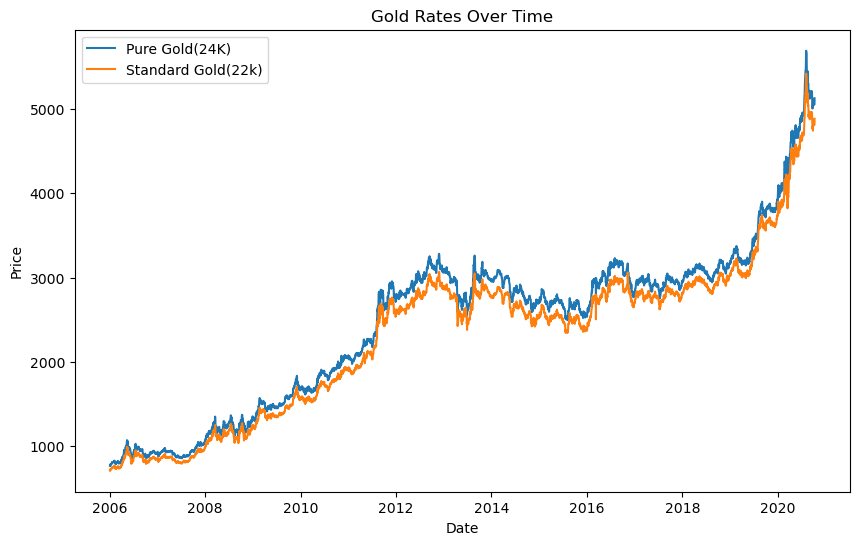

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Pure Gold (24 k)'], label='Pure Gold(24K)')
plt.plot(df['Date'], df['Standard Gold (22 K)'], label='Standard Gold(22k)')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Rates Over Time')
plt.legend()
plt.show()

# Stationarity test

In [7]:
from statsmodels.tsa.stattools import adfuller,kpss
warnings.filterwarnings('ignore')
# Function to perform the Dickey-Fuller test for stationarity
def stationarity_test(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    result = kpss(timeseries)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critial Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] < 0.05:
        print(f'{column} data is stationary.')
    else:
        print(f'{genre} data is not stationary, differencing may be required.')

# Check stationarity for each stock
for column in df.columns[4:]:
    print('\nStationarity test for', column)
    stationarity_test(df[column])


Stationarity test for Pure Gold (24 k)
ADF Statistic: 0.4547888264474452
p-value: 0.9834321895612961
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Statistic: 9.502726777957067
p-value: 0.01
Critial Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Pure Gold (24 k) data is stationary.

Stationarity test for Standard Gold (22 K)
ADF Statistic: 0.5425885223796895
p-value: 0.9861116435386643
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Statistic: 9.594409965030847
p-value: 0.01
Critial Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Standard Gold (22 K) data is stationary.


# Identifying the patterns


Patterns for Pure Gold (24 k)


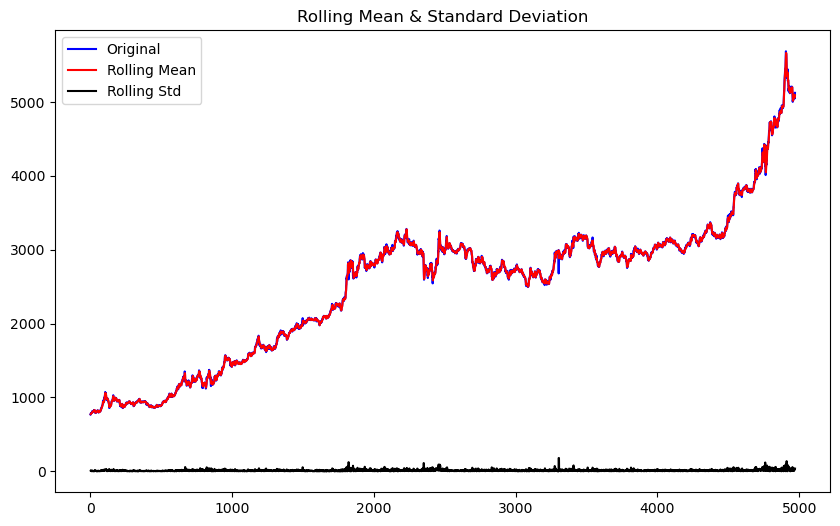


Inference for Pure Gold (24 k):
Trend: No clear trend
Seasonality: Seasonality detected
Volatility: High
Outliers: No outliers

Patterns for Standard Gold (22 K)


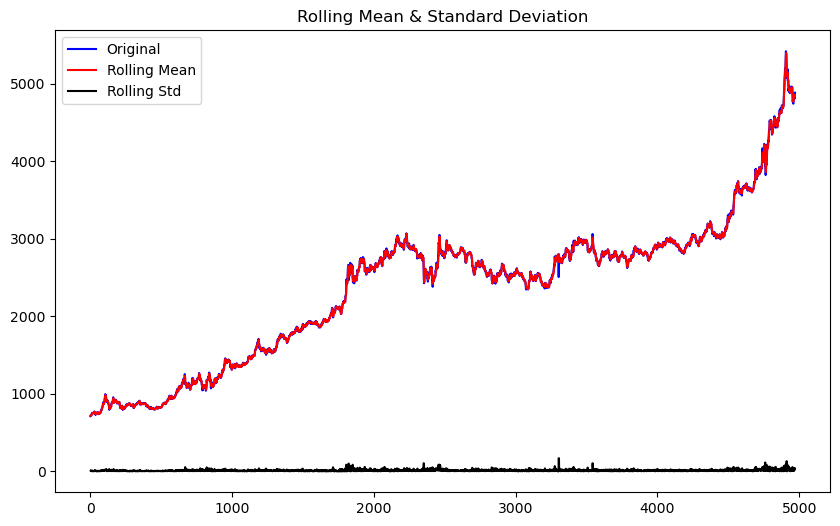


Inference for Standard Gold (22 K):
Trend: No clear trend
Seasonality: Seasonality detected
Volatility: High
Outliers: No outliers


In [8]:
def patterns(timeseries, window):
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    # Infer trend
    if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
        trend = "Increasing"
    elif rolling_mean.iloc[-1] < rolling_mean.iloc[0]:
        trend = "Decreasing"
    else:
        trend = "No clear trend"

    # Infer seasonality
    if rolling_mean.std() < 1e-6:
        seasonality = "No seasonality"
    else:
        seasonality = "Seasonality detected"

    # Infer volatility
    if rolling_std.iloc[-1] > rolling_std.mean():
        volatility = "High"
    else:
        volatility = "Low"

    # Infer outliers
    outliers = "Possible outliers" if ((timeseries - rolling_mean).abs() > 2 * rolling_std).any() else "No outliers"

    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    return trend, seasonality, volatility, outliers

# Identify patterns in each stock
for column in df.columns[4:]:
    print('\nPatterns for', column)
    trend, seasonality, volatility, outliers = patterns(df[column], window=3)
    print(f"\nInference for {column}:")
    print(f"Trend: {trend}")
    print(f"Seasonality: {seasonality}")
    print(f"Volatility: {volatility}")
    print(f"Outliers: {outliers}")

# ARIMA Model


ARIMA model for Pure Gold (24 k)


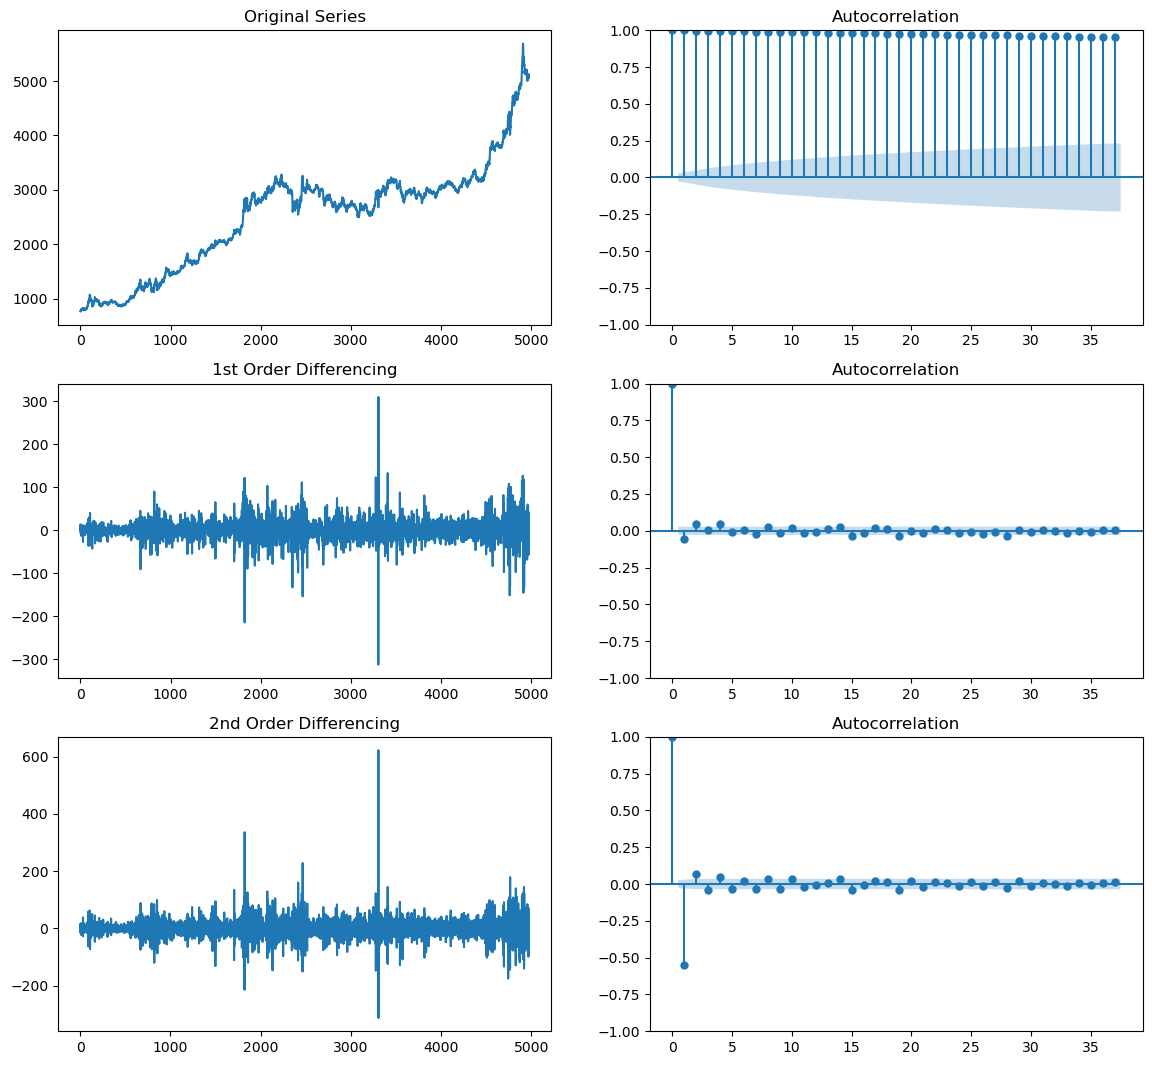

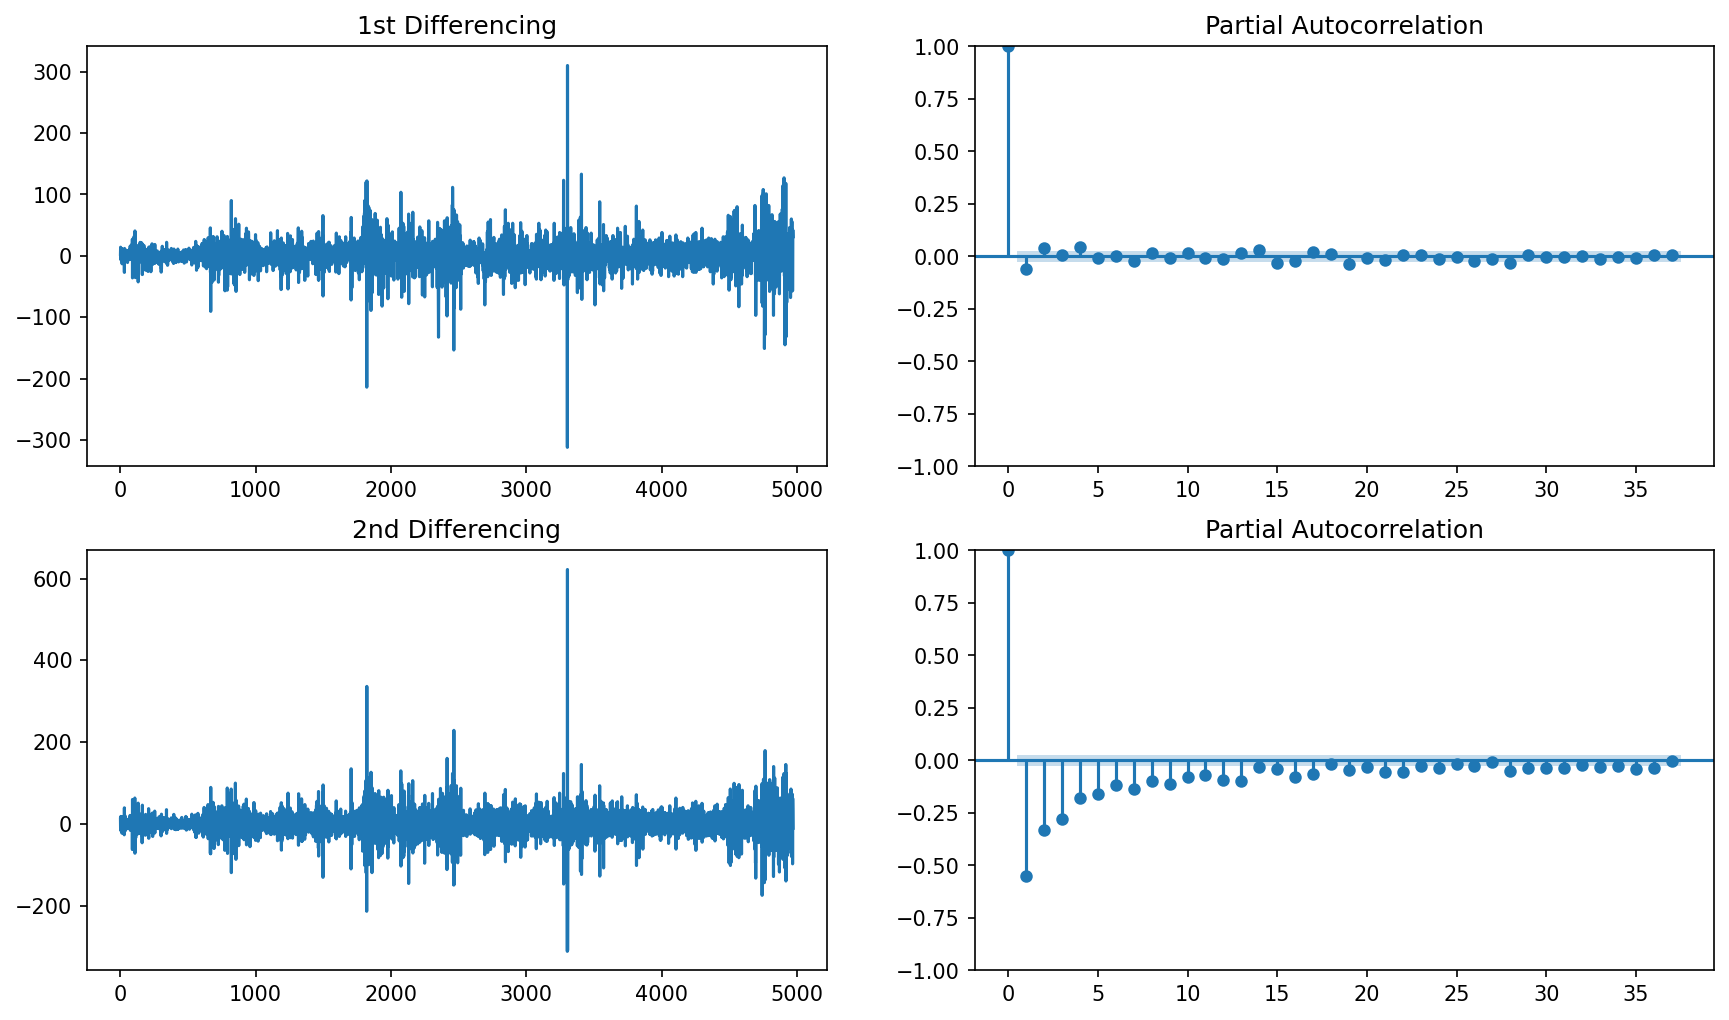


ARIMA model for Standard Gold (22 K)


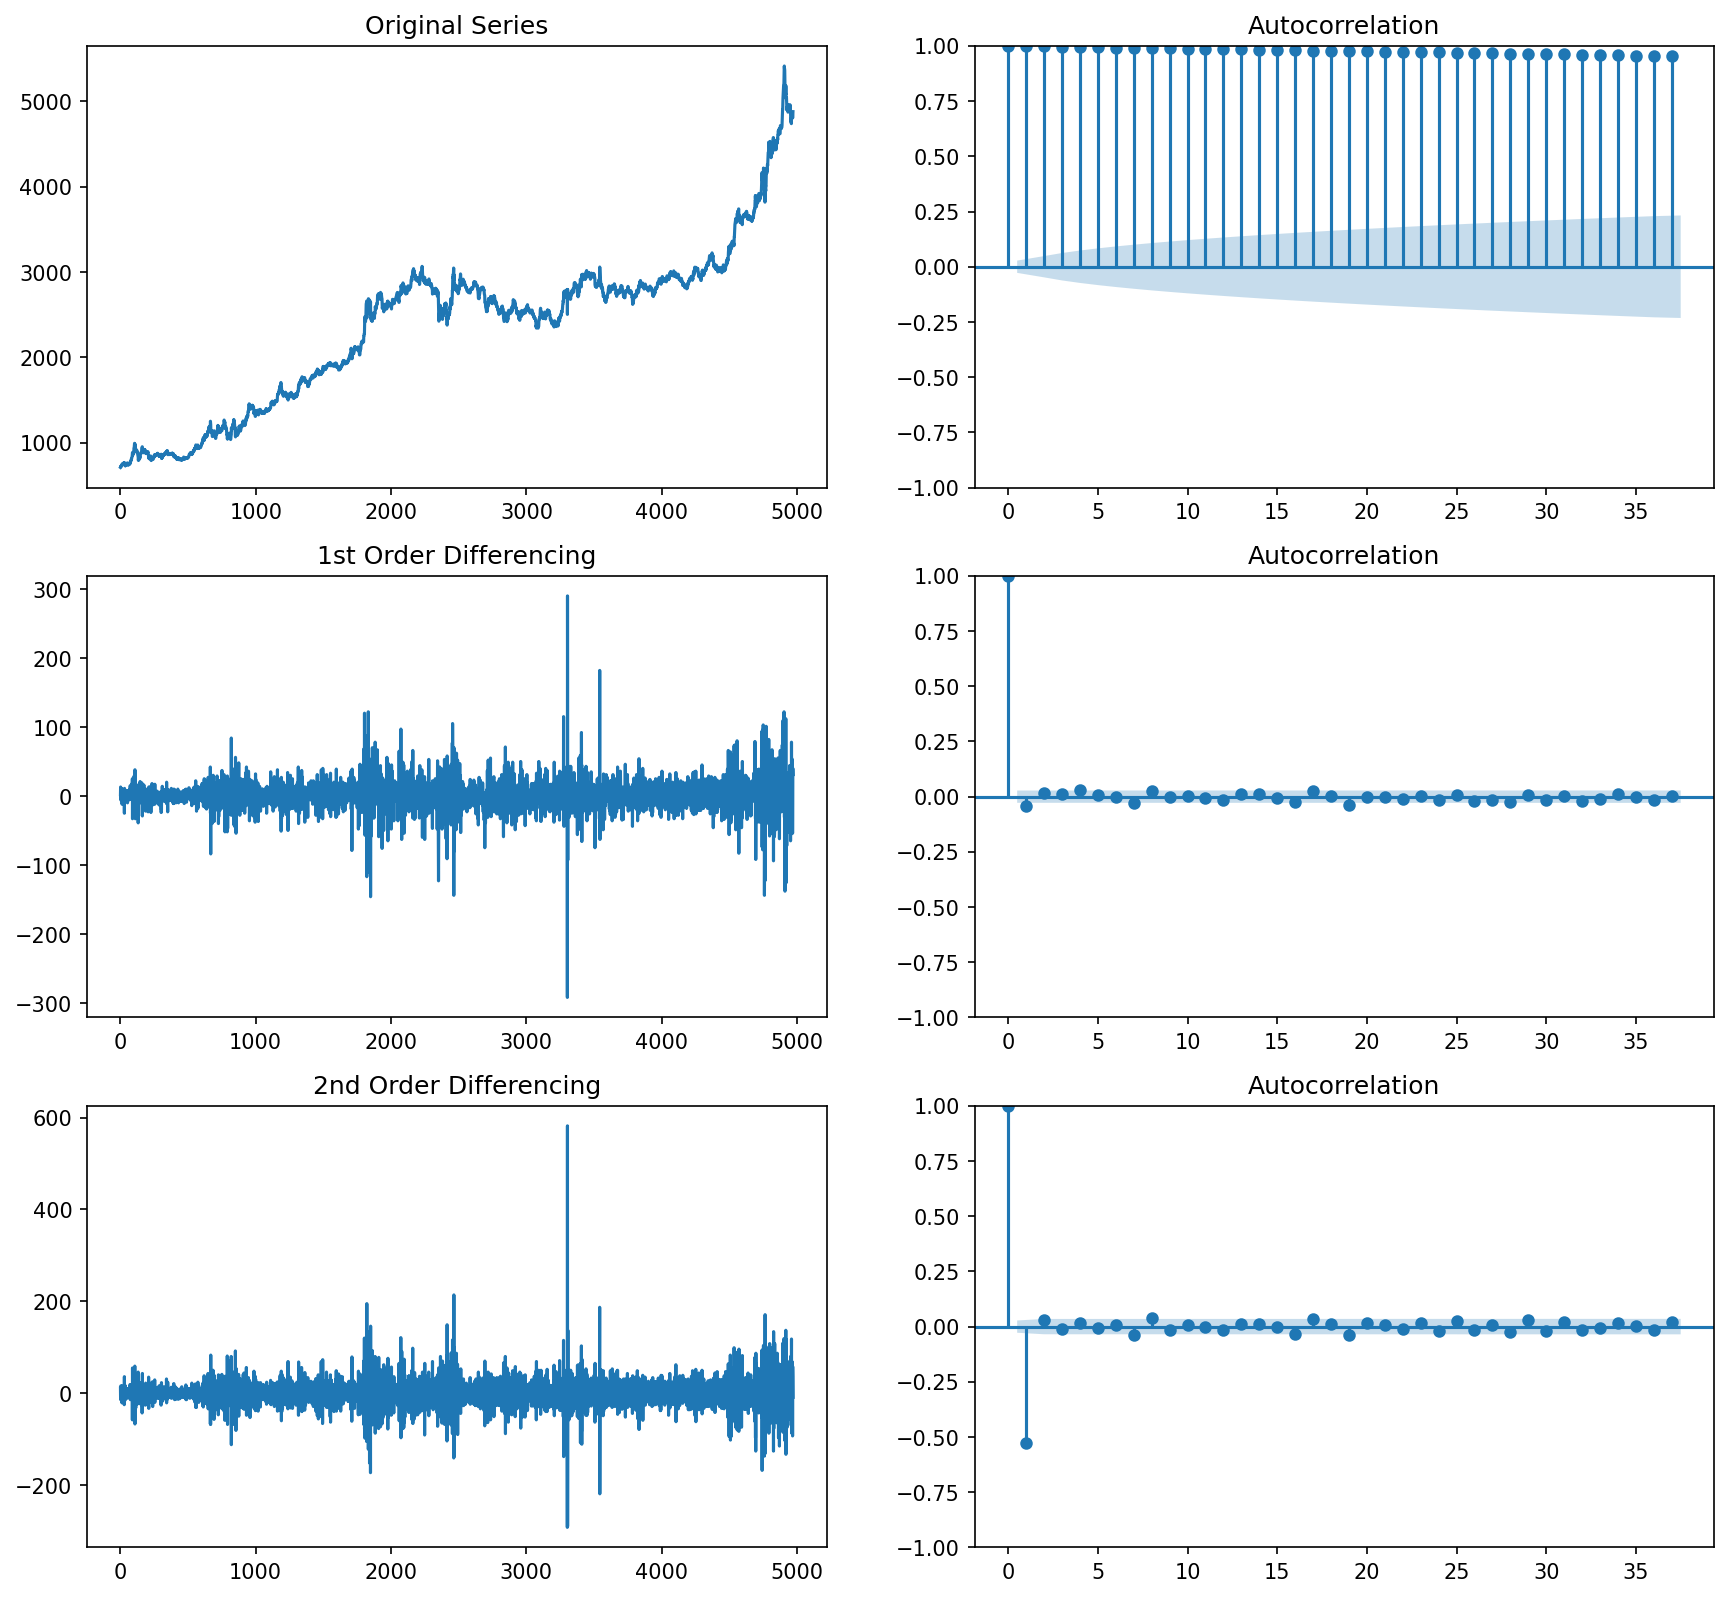

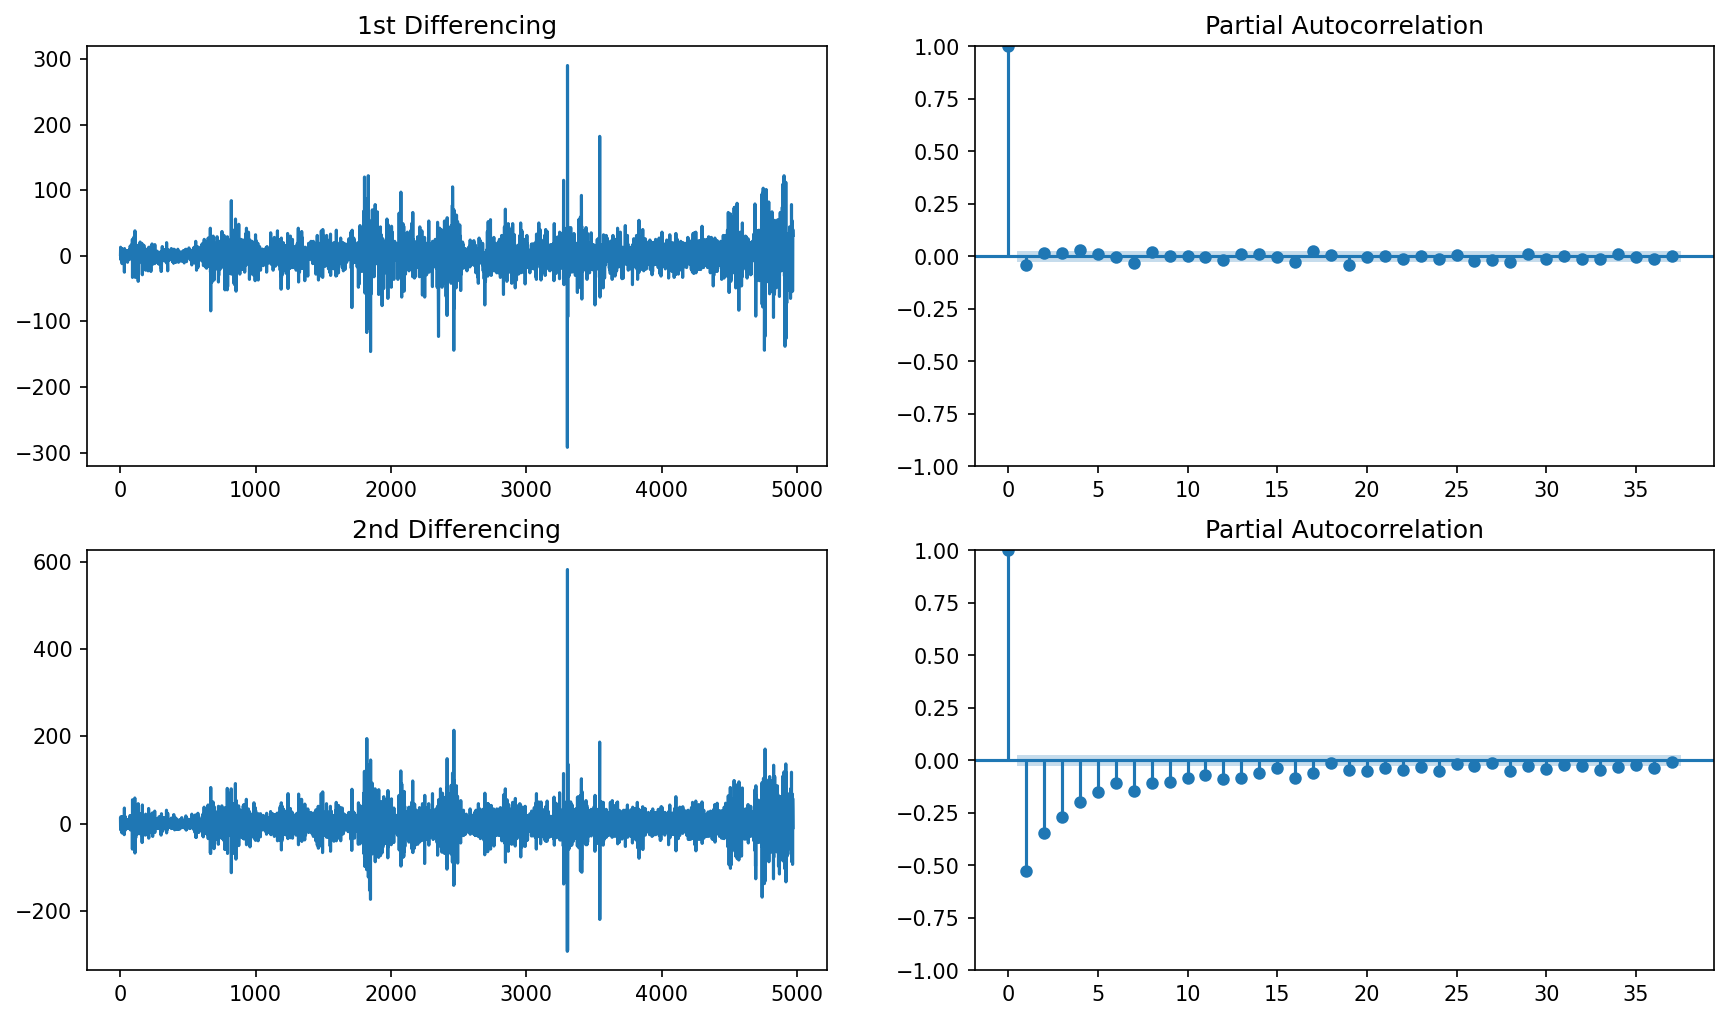

In [9]:
def autocorrelation(timeseries):
    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=False)

    fig.set_size_inches(14,13)

    axes[0, 0].plot(timeseries.values); axes[0, 0].set_title('Original Series')
    plot_acf(timeseries.values, ax=axes[0, 1])


    # 1st Differencing
    axes[1, 0].plot(timeseries.diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(timeseries.diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(timeseries.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(timeseries.diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

def partial_autocorrelation(timeseries):
    # PACF plot of 1st differenced series
    plt.rcParams.update({'figure.figsize':(14,8), 'figure.dpi':150})

    ## first order differencing
    fig, axes = plt.subplots(2, 2, sharex=False)
    axes[0, 0].plot(timeseries.diff()); axes[0, 0].set_title('1st Differencing')
    plot_pacf(timeseries.diff().dropna(), ax=axes[0, 1])

    ## second order differencing
    axes[1, 0].plot(timeseries.diff().diff()); axes[1, 0].set_title('2nd Differencing')
    plot_pacf(timeseries.diff().diff().dropna(), ax=axes[1, 1])

    plt.show()

for column in df.columns[4:]:
    print('\nARIMA model for', column)
    autocorrelation(df[column])
    partial_autocorrelation(df[column])

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define a function to fit ARIMA model and make predictions
def fit_arima(timeseries, order):
    # Fit ARIMA model
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    print(model_fit.summary())

# Define order for ARIMA model (p, d, q)
order = (1, 1, 0)  # Example order, you can adjust these values

# Fit ARIMA model and make predictions for each stock
for column in df.columns[4:]:
    print('\nARIMA model for', column)
    fit_arima(df[column], order)



ARIMA model for Pure Gold (24 k)
                               SARIMAX Results                                
Dep. Variable:       Pure Gold (24 k)   No. Observations:                 4971
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -22247.550
Date:                Thu, 09 May 2024   AIC                          44499.099
Time:                        23:00:15   BIC                          44512.122
Sample:                             0   HQIC                         44503.665
                               - 4971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0573      0.005    -12.306      0.000      -0.066      -0.048
sigma2       452.6214      2.719    166.457      0.000     447.292     457.951
Ljung-Box (L1) (Q)

# Prediction 

In [11]:
# Define a function to fit ARIMA model and make predictions
def predict(timeseries, order):
    # Fit ARIMA model
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.predict(start=0, end=len(timeseries)-1)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(timeseries, predictions))
    
    return model_fit, predictions, rmse

# Define order for ARIMA model (p, d, q)
order = (1, 1, 0)  # Example order, you can adjust these values

# Fit ARIMA model and make predictions for each stock
for column in df.columns[4:]:
    print('\nARIMA model for', column)
    model_fit, predictions, rmse = predict(df[column], order)
    print('ARIMA RMSE:', rmse)
    print('Predictions:')
    print(predictions)


ARIMA model for Pure Gold (24 k)
ARIMA RMSE: 23.89757297993942
Predictions:
0          0.000000
1        767.980035
2        770.356820
3        783.698191
4        782.614544
           ...     
4966    5063.775434
4967    5100.651845
4968    5049.264508
4969    5050.713640
4970    5090.594573
Name: predicted_mean, Length: 4971, dtype: float64

ARIMA model for Standard Gold (22 K)
ARIMA RMSE: 22.624762841321136
Predictions:
0          0.000000
1        710.988788
2        712.923223
3        725.500953
4        725.038388
           ...     
4966    4822.113259
4967    4858.502858
4968    4808.072966
4969    4809.846447
4970    4848.464470
Name: predicted_mean, Length: 4971, dtype: float64
